# importing required libraries

In [43]:
import numpy as np
import pandas as pd


In [44]:
raw=pd.read_csv('/content/german_credit_data.csv')

In [45]:
# Read the data set
df=pd.read_csv('/content/german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


#Data Understanding

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


Insights:
- There are total 1000 rows and 10 columns
- savings accounts and checking account attributes contains null values
- There is no target attribute in the data set which says whether it is good credit or bad credit.
- Serial number coulmn is unammed.

In [47]:
# cheking null values:
print(df.isnull().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [48]:
#checking for duplicate values:
print(df.duplicated().sum())

0


Insights:
- There are no duplicate rows in the dataset.


## Cleaning null values


Here the missing values in saving accounts and checking account attributes are replaced with "UNKOWN". This is done because:
- Keeps all data (no row loss)
- prediction will be realistic.

In [49]:
df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)


<ipython-input-49-4e1080b0fdb3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('unknown', inplace=True)
<ipython-input-49-4e1080b0fdb3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [50]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0


removing unnmaed column


In [51]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## Identifying categorical and non categorical datasets.

In [52]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,unknown,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [53]:
#Printing no of  unique vlaues of each attribute.
for column in df.columns:
    print(f"Unique values for {column}:")
    print(df[column].nunique())
    print("-" * 20)


Unique values for Age:
53
--------------------
Unique values for Sex:
2
--------------------
Unique values for Job:
4
--------------------
Unique values for Housing:
3
--------------------
Unique values for Saving accounts:
5
--------------------
Unique values for Checking account:
4
--------------------
Unique values for Credit amount:
921
--------------------
Unique values for Duration:
33
--------------------
Unique values for Purpose:
8
--------------------


Insights:
- As there are many attributes with less no of unique values, so they can be considered as categorical attributes.
- Remaining attributes with more unique values (i.e greater than ) non-catergorical attributes.

Consideration:
- Number of unique values which are less than 10 considered as categorical values.

##Categorical attributes

In [54]:
# printing categorical attributes unique values.:
for column in df.columns:
  if df[column].nunique()<10:
    print(f"Unique values for {column}:")
    print(df[column].unique())
    print("-" * 20)



Unique values for Sex:
['male' 'female']
--------------------
Unique values for Job:
[2 1 3 0]
--------------------
Unique values for Housing:
['own' 'free' 'rent']
--------------------
Unique values for Saving accounts:
['unknown' 'little' 'quite rich' 'rich' 'moderate']
--------------------
Unique values for Checking account:
['little' 'moderate' 'unknown' 'rich']
--------------------
Unique values for Purpose:
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
--------------------


In [55]:
print("categorical attributes: ")
for column in df.columns:
  if df[column].nunique()<10:
    print(column,end=',')
print('\n')
print("Non Categorical attributes: ")
for column in df.columns:
  if df[column].nunique()>=10:
    print(column,end=",")


categorical attributes: 
Sex,Job,Housing,Saving accounts,Checking account,Purpose,

Non Categorical attributes: 
Age,Credit amount,Duration,

# Creating target attribute

In [56]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,unknown,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


### Encoding saving acoounts and checking account using ordinal encodiing.

In [57]:
saving_mapping = {'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3, 'unknown': -1}
df['Saving accounts'] = df['Saving accounts'].map(saving_mapping)

In [58]:
checking_map = {
    'unknown': -1,
    'little': 0,
    'moderate': 1,
    'rich': 2
}
df['Checking account'] = df['Checking account'].map(checking_map)


### One-hot encoding

In [59]:
# #Sex — Nominal → One-Hot Encode
# df = pd.get_dummies(df, columns=['Sex'], drop_first=True)  # creates 'Sex_male'


for Job no changes are required since the values are ordinal.

In [60]:
#Housing — Nominal → One-Hot Encode
df = pd.get_dummies(df, columns=['Housing'], drop_first=True)


In [61]:
# #Purpose — Nominal → One-Hot Encode
# df = pd.get_dummies(df, columns=['Purpose'], drop_first=True)

In [62]:
df.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Housing_own,Housing_rent
0,67,male,2,-1,0,1169,6,radio/TV,True,False
1,22,female,2,0,1,5951,48,radio/TV,True,False
2,49,male,1,0,-1,2096,12,education,True,False
3,45,male,2,0,0,7882,42,furniture/equipment,False,False
4,53,male,2,0,0,4870,24,car,False,False


### Normalize Numeric Features

In [63]:
import pickle
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler
scaler = MinMaxScaler()
df[['Age', 'Credit amount', 'Duration']] = scaler.fit_transform(df[['Age', 'Credit amount', 'Duration']])

# Save the fitted scaler to a .pkl file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [64]:
df.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Housing_own,Housing_rent
0,0.857143,male,2,-1,0,0.050567,0.029412,radio/TV,True,False
1,0.053571,female,2,0,1,0.313690,0.647059,radio/TV,True,False
2,0.535714,male,1,0,-1,0.101574,0.117647,education,True,False
3,0.464286,male,2,0,0,0.419941,0.558824,furniture/equipment,False,False
4,0.607143,male,2,0,0,0.254209,0.294118,car,False,False


##Composite Score method
i will consider some important features and add wights to it based on knowledge of FICO score.
which are:
Age  
Job  
Saving accounts  
Checking account  
Credit amount  
Duration  
Housing_own  
Housing_rent  



In [65]:
df.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Housing_own,Housing_rent
0,0.857143,male,2,-1,0,0.050567,0.029412,radio/TV,True,False
1,0.053571,female,2,0,1,0.313690,0.647059,radio/TV,True,False
2,0.535714,male,1,0,-1,0.101574,0.117647,education,True,False
3,0.464286,male,2,0,0,0.419941,0.558824,furniture/equipment,False,False
4,0.607143,male,2,0,0,0.254209,0.294118,car,False,False


Let’s assume relative weights:

Saving accounts & Checking account: 1.5

Age and Job: 1.0

Credit amount: -2.0

Duration: -1.5

housing_Score: 0.75


In [66]:
df['composite_score'] = (
    (df['Age'] * 1.0) +
    (df['Job'] * 1.0) +
    (df['Saving accounts'] * 1.5) +
    (df['Checking account'] * 1.5) +
    (df['Credit amount'] * -2.0) +
    (df['Duration'] * -1.5) +
    (df['Housing_own'] * 1.0) +
    (df['Housing_rent'] * 0.5)
)

In [67]:
#Threshold to Classify as Good/Bad Credit
threshold = df['composite_score'].median()

df['target'] = df['composite_score'].apply(lambda x: 1 if x >= threshold else 0)


In [68]:
df['target'].value_counts()


,count
target,
0,500
1,500


according to this method the half of the cutomers have bad credit score and remaining half have good credit score.


In [69]:
df.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Housing_own,Housing_rent,composite_score,target
0,0.857143,male,2,-1,0,0.050567,0.029412,radio/TV,True,False,2.211892,0
1,0.053571,female,2,0,1,0.313690,0.647059,radio/TV,True,False,2.955603,1
2,0.535714,male,1,0,-1,0.101574,0.117647,education,True,False,0.656096,0
3,0.464286,male,2,0,0,0.419941,0.558824,furniture/equipment,False,False,0.786169,0
4,0.607143,male,2,0,0,0.254209,0.294118,car,False,False,1.657548,0


In [70]:
df.describe()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,composite_score,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.295464,1.904000,0.190000,0.001000,0.166241,0.248574,2.583123,0.50000
std,0.203133,0.653614,0.966869,0.957034,0.155317,0.177336,2.161939,0.50025
min,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-3.389135,0.00000
25%,0.142857,2.000000,0.000000,-1.000000,0.061379,0.117647,1.078975,0.00000
50%,0.250000,2.000000,0.000000,0.000000,0.113871,0.205882,2.395270,0.50000
75%,0.410714,2.000000,0.000000,1.000000,0.204812,0.294118,3.959170,1.00000
max,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,10.249596,1.00000


#EDA

##checking whether target variable is balanced or not.

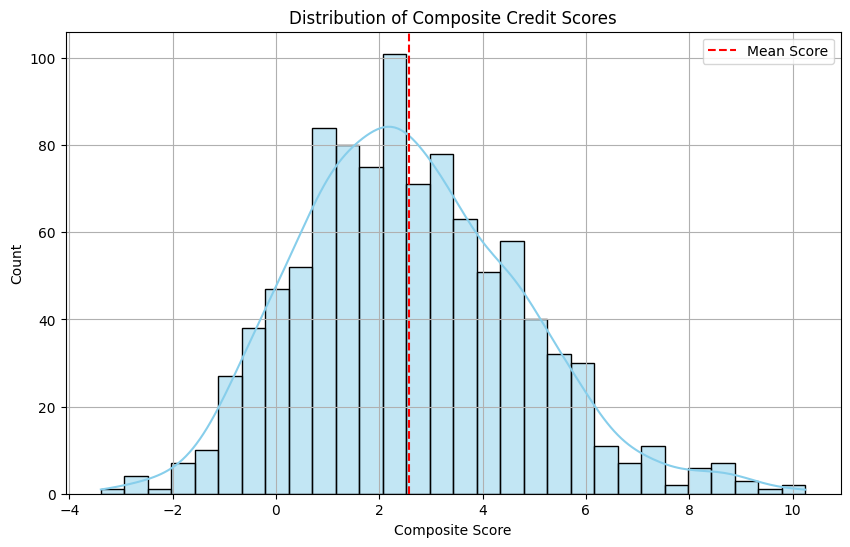

In [71]:
#Composite Score Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['composite_score'], kde=True, bins=30, color='skyblue')
plt.axvline(df['composite_score'].mean(), color='red', linestyle='--', label='Mean Score')
plt.title('Distribution of Composite Credit Scores')
plt.xlabel('Composite Score')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


The distribution seem to normal distribution.

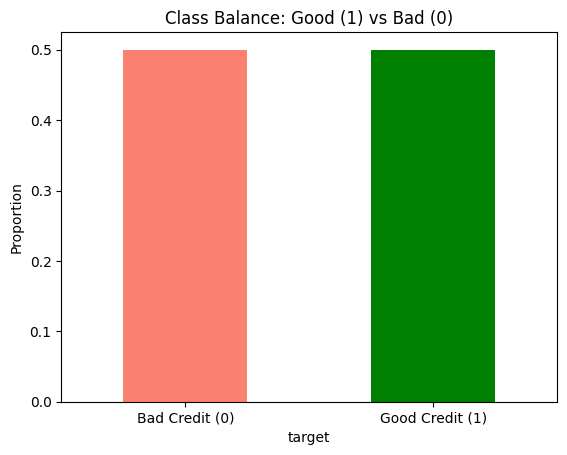

In [72]:
df['target'].value_counts(normalize=True).plot(kind='bar', color=['salmon', 'green'])
plt.title('Class Balance: Good (1) vs Bad (0)')
plt.xticks(ticks=[0, 1], labels=['Bad Credit (0)', 'Good Credit (1)'], rotation=0)
plt.ylabel('Proportion')
plt.show()


This shows that there are equal number of good and bade credits.

Insights:

Target variable is balanced.

## feature correlation

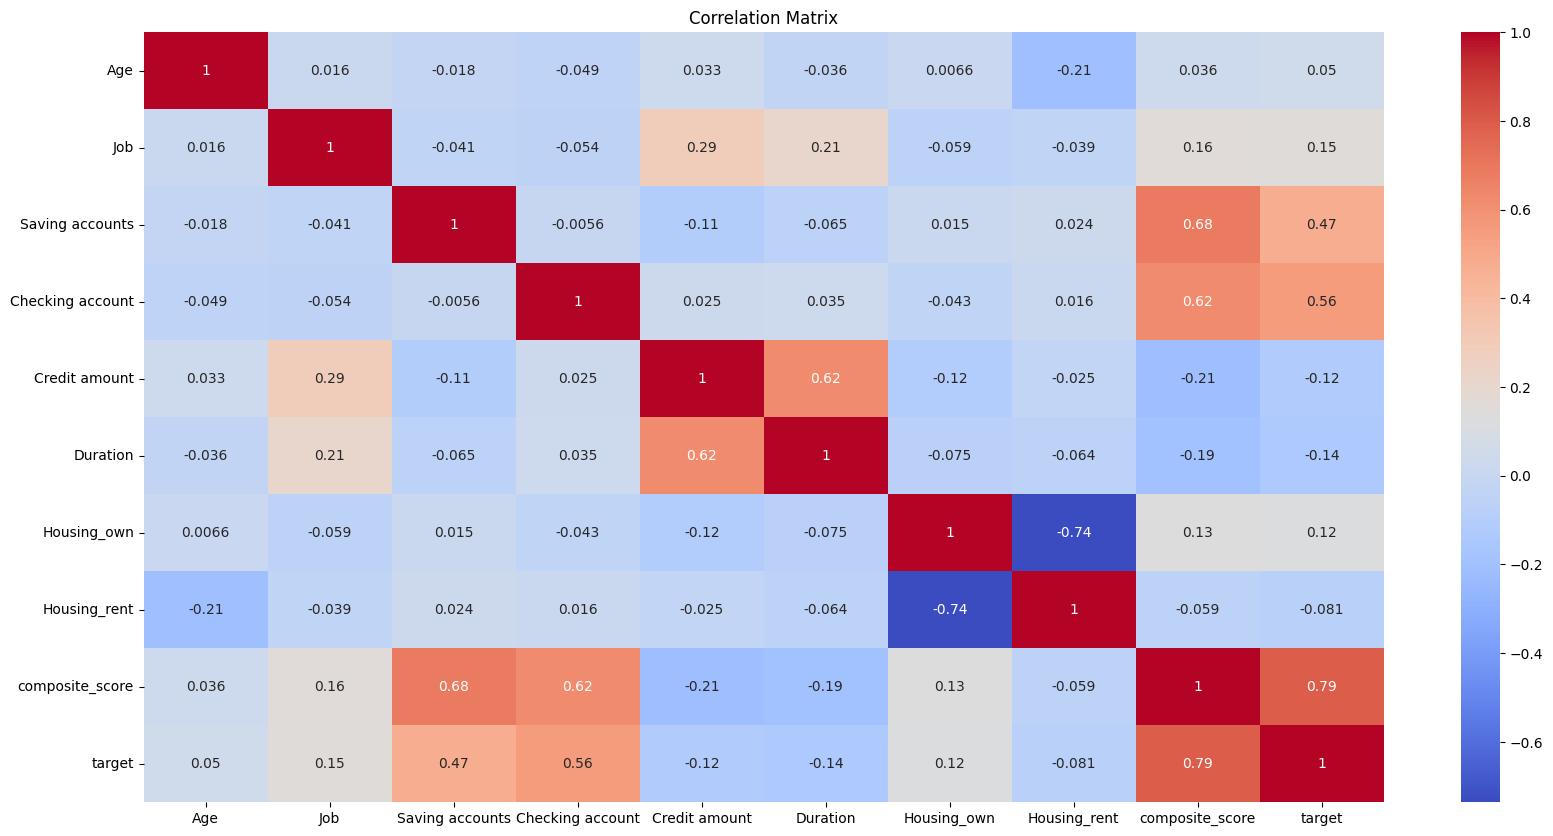

In [73]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Insights:
- The negative correlation between credit amount or duration and target confirms that our composite formula is capturing risk behavior correctly.
- Strong predictors: composite_score, Checking account, Saving accounts,crediti amount and duration.

- Moderate predictors: Housing, Job.
- saving account ans checking account have multi collinearity with composite score and target.



In [74]:
correlations = df.corr(numeric_only=True)['target'].sort_values(ascending=False)
print(correlations)


target              1.000000
composite_score     0.790236
Checking account    0.557207
Saving accounts     0.473931
Job                 0.146949
Housing_own         0.121584
Age                 0.050309
Housing_rent       -0.080866
Credit amount      -0.121484
Duration           -0.141627
Name: target, dtype: float64


## Univariate analysis


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization aesthetics
sns.set(style="whitegrid")


In [76]:
df.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Housing_own,Housing_rent,composite_score,target
0,0.857143,male,2,-1,0,0.050567,0.029412,radio/TV,True,False,2.211892,0
1,0.053571,female,2,0,1,0.313690,0.647059,radio/TV,True,False,2.955603,1
2,0.535714,male,1,0,-1,0.101574,0.117647,education,True,False,0.656096,0
3,0.464286,male,2,0,0,0.419941,0.558824,furniture/equipment,False,False,0.786169,0
4,0.607143,male,2,0,0,0.254209,0.294118,car,False,False,1.657548,0


In [77]:
categorical_features = []
numerical_features = []
for column in df.columns:
  if df[column].nunique()<10:
    categorical_features.append(str(column))
  else:
    numerical_features.append(str(column))



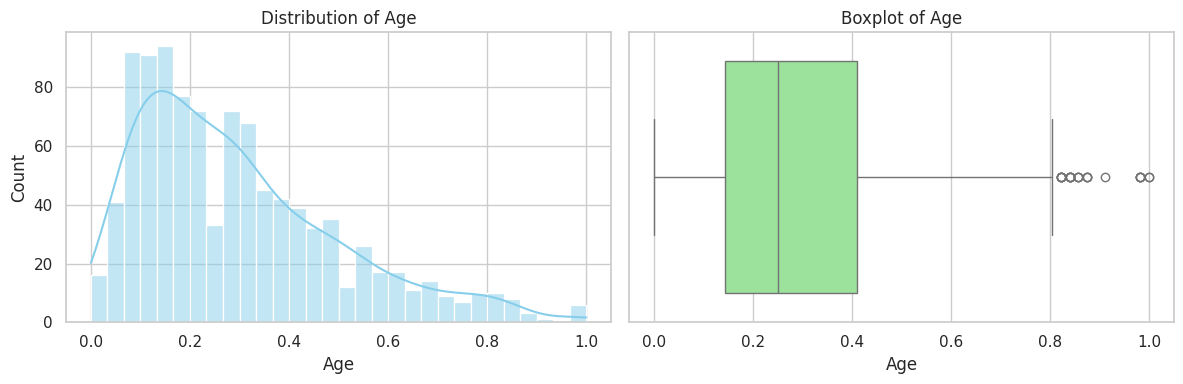

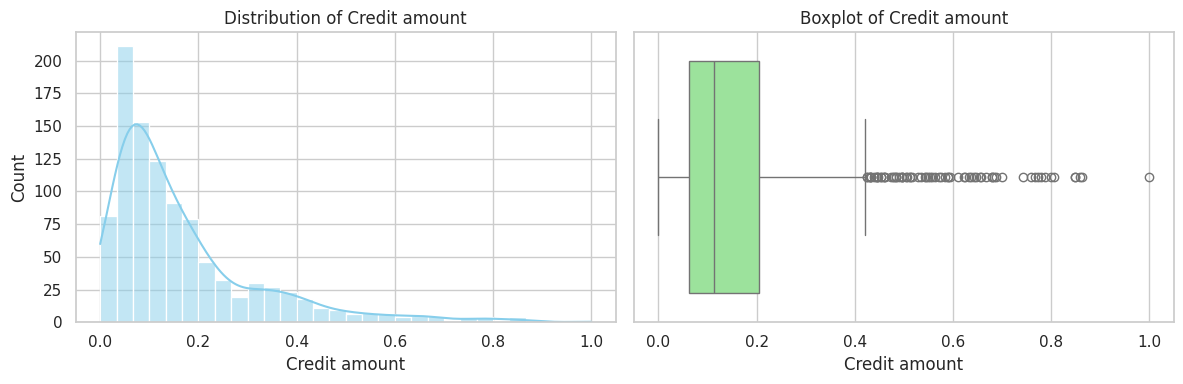

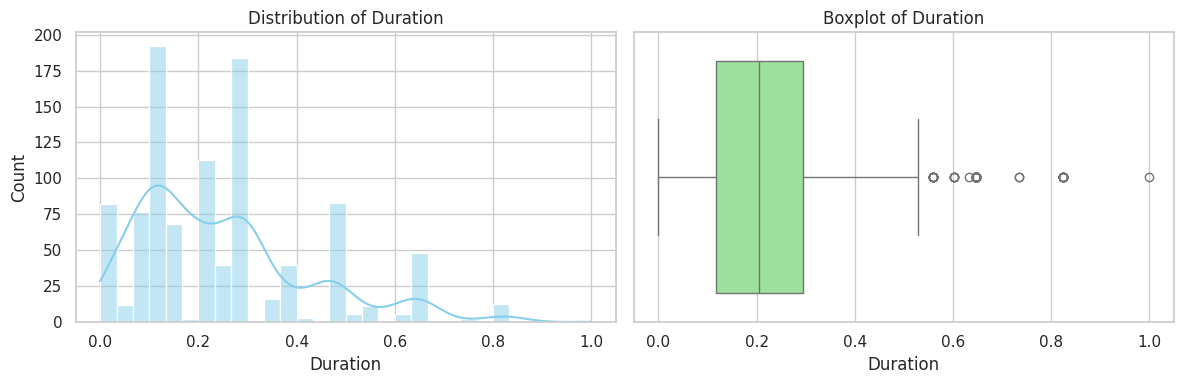

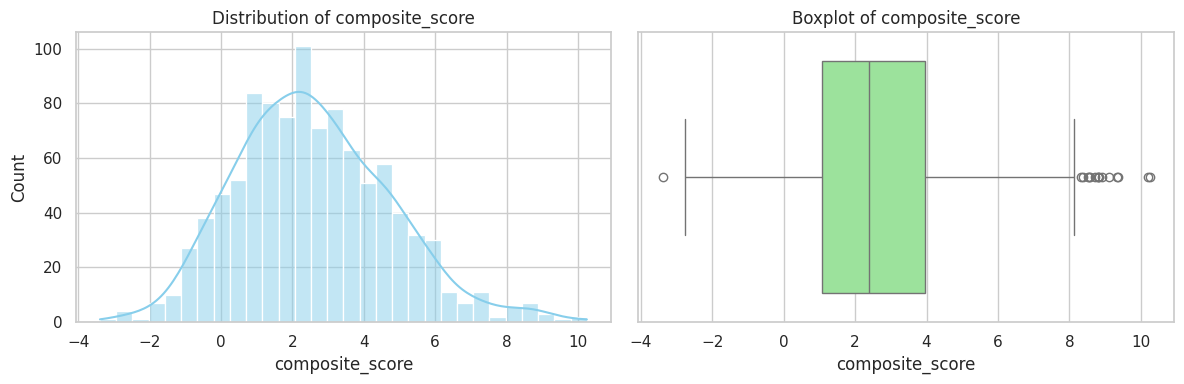

In [78]:
for col in numerical_features:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


In [79]:
print(raw['Age'].describe())
print(df['Age'].describe())

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64
count    1000.000000
mean        0.295464
std         0.203133
min         0.000000
25%         0.142857
50%         0.250000
75%         0.410714
max         1.000000
Name: Age, dtype: float64


Insights:
- The Age attribute data skewed
- outliers in Age are valid


In [80]:
print(raw['Credit amount'].describe())
print(df['Credit amount'].describe())

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64
count    1000.000000
mean        0.166241
std         0.155317
min         0.000000
25%         0.061379
50%         0.113871
75%         0.204812
max         1.000000
Name: Credit amount, dtype: float64


Insights:
- credit amount skewed and have valid outlier.

<ipython-input-81-b774eb313178>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=df[col].value_counts().index)


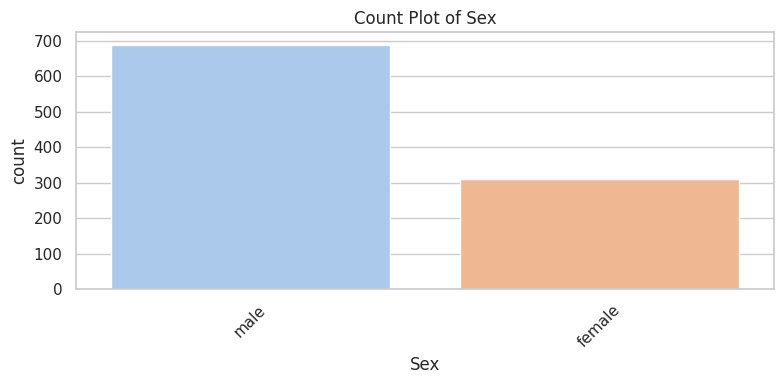

<ipython-input-81-b774eb313178>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=df[col].value_counts().index)


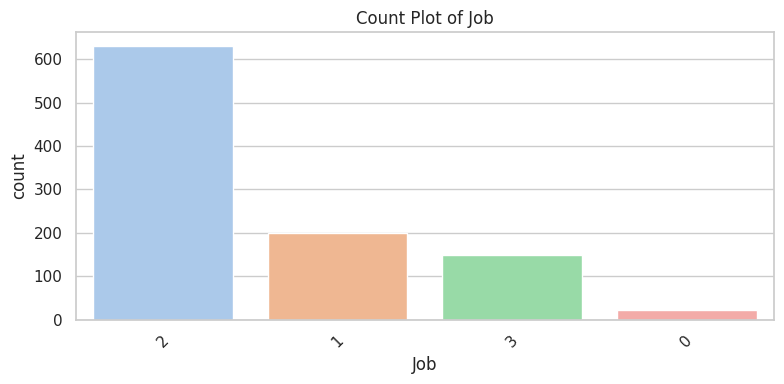

<ipython-input-81-b774eb313178>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=df[col].value_counts().index)


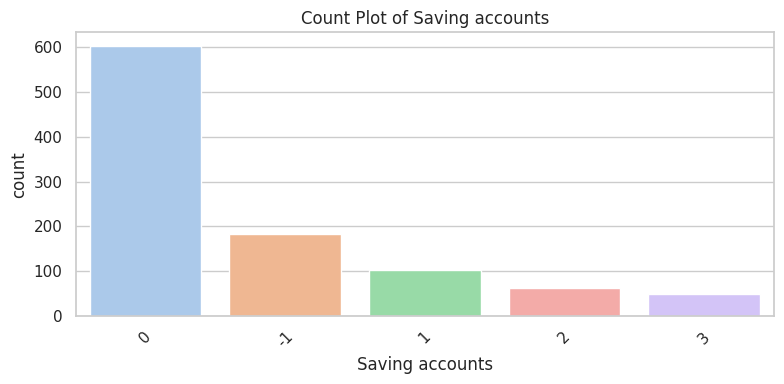

<ipython-input-81-b774eb313178>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=df[col].value_counts().index)


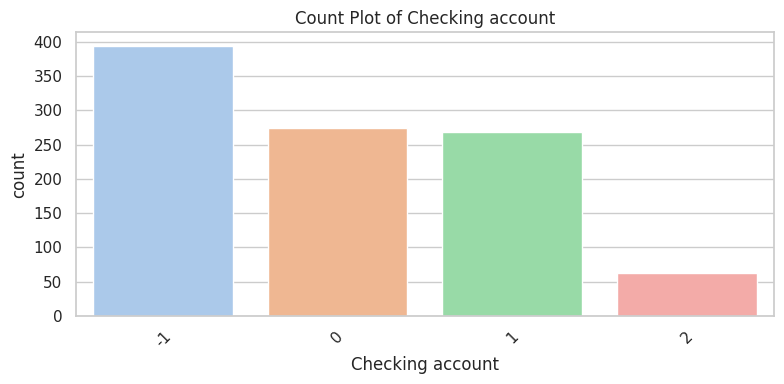

<ipython-input-81-b774eb313178>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=df[col].value_counts().index)


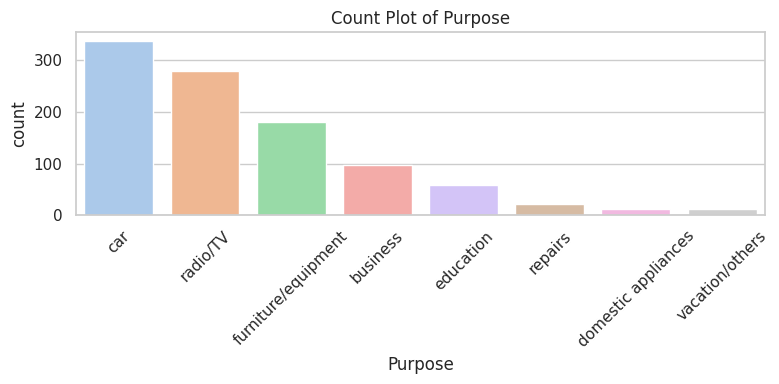

<ipython-input-81-b774eb313178>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=df[col].value_counts().index)


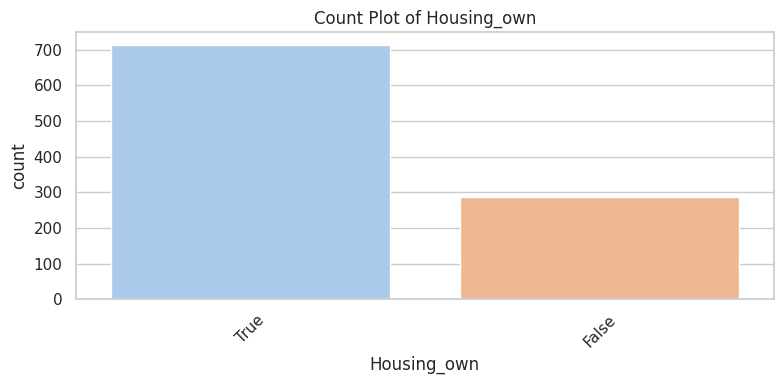

<ipython-input-81-b774eb313178>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=df[col].value_counts().index)


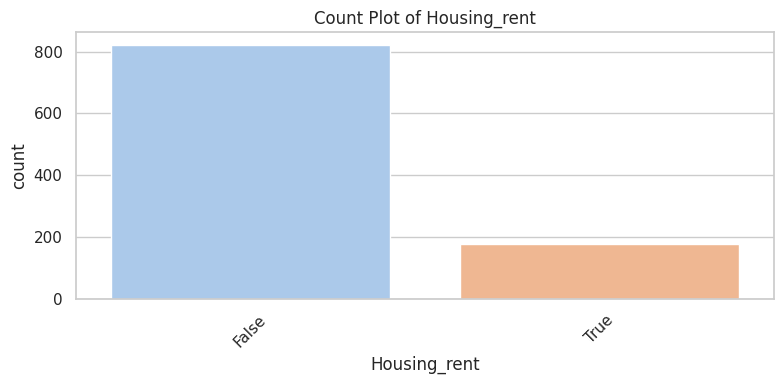

<ipython-input-81-b774eb313178>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=df[col].value_counts().index)


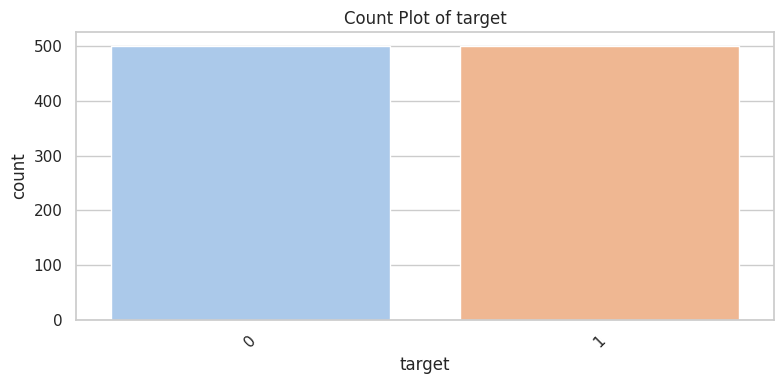

In [81]:
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='pastel', order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Insights:
- every thing looks normal.

# Outlier detection and handling

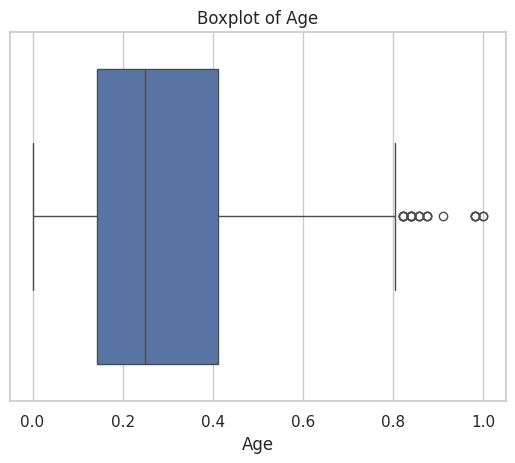

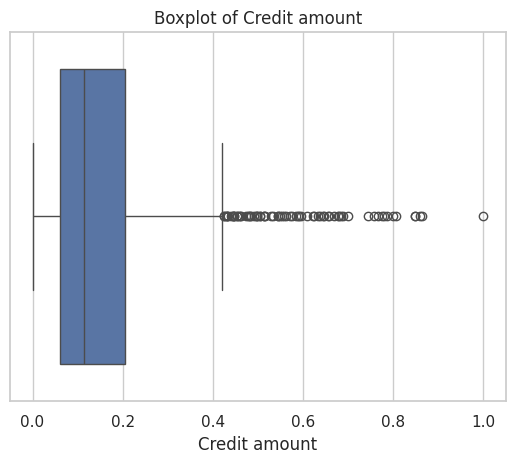

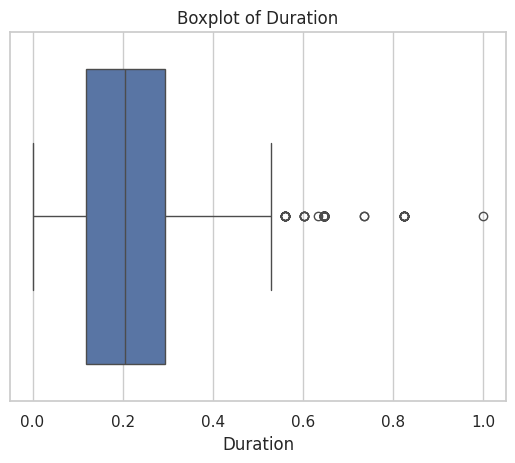

In [82]:
features = ['Age', 'Credit amount', 'Duration']
for col in features:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Comments:
- as the all outliers are valid data and important. so we are skipping the removal of outlier for better performance.

##Feature Engineering

In [83]:
df.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Housing_own,Housing_rent,composite_score,target
0,0.857143,male,2,-1,0,0.050567,0.029412,radio/TV,True,False,2.211892,0
1,0.053571,female,2,0,1,0.313690,0.647059,radio/TV,True,False,2.955603,1
2,0.535714,male,1,0,-1,0.101574,0.117647,education,True,False,0.656096,0
3,0.464286,male,2,0,0,0.419941,0.558824,furniture/equipment,False,False,0.786169,0
4,0.607143,male,2,0,0,0.254209,0.294118,car,False,False,1.657548,0


In [84]:
df.describe()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,composite_score,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.295464,1.904000,0.190000,0.001000,0.166241,0.248574,2.583123,0.50000
std,0.203133,0.653614,0.966869,0.957034,0.155317,0.177336,2.161939,0.50025
min,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-3.389135,0.00000
25%,0.142857,2.000000,0.000000,-1.000000,0.061379,0.117647,1.078975,0.00000
50%,0.250000,2.000000,0.000000,0.000000,0.113871,0.205882,2.395270,0.50000
75%,0.410714,2.000000,0.000000,1.000000,0.204812,0.294118,3.959170,1.00000
max,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,10.249596,1.00000


###One-hot encoding.

In [85]:
#Sex — Nominal → One-Hot Encode
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)  # creates 'Sex_male'

In [86]:
#Purpose — Nominal → One-Hot Encode
df = pd.get_dummies(df, columns=['Purpose'], drop_first=True)

In [87]:
df.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_own,Housing_rent,composite_score,target,Sex_male,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.857143,2,-1,0,0.050567,0.029412,True,False,2.211892,0,True,False,False,False,False,True,False,False
1,0.053571,2,0,1,0.313690,0.647059,True,False,2.955603,1,False,False,False,False,False,True,False,False
2,0.535714,1,0,-1,0.101574,0.117647,True,False,0.656096,0,True,False,False,True,False,False,False,False
3,0.464286,2,0,0,0.419941,0.558824,False,False,0.786169,0,True,False,False,False,True,False,False,False
4,0.607143,2,0,0,0.254209,0.294118,False,False,1.657548,0,True,True,False,False,False,False,False,False


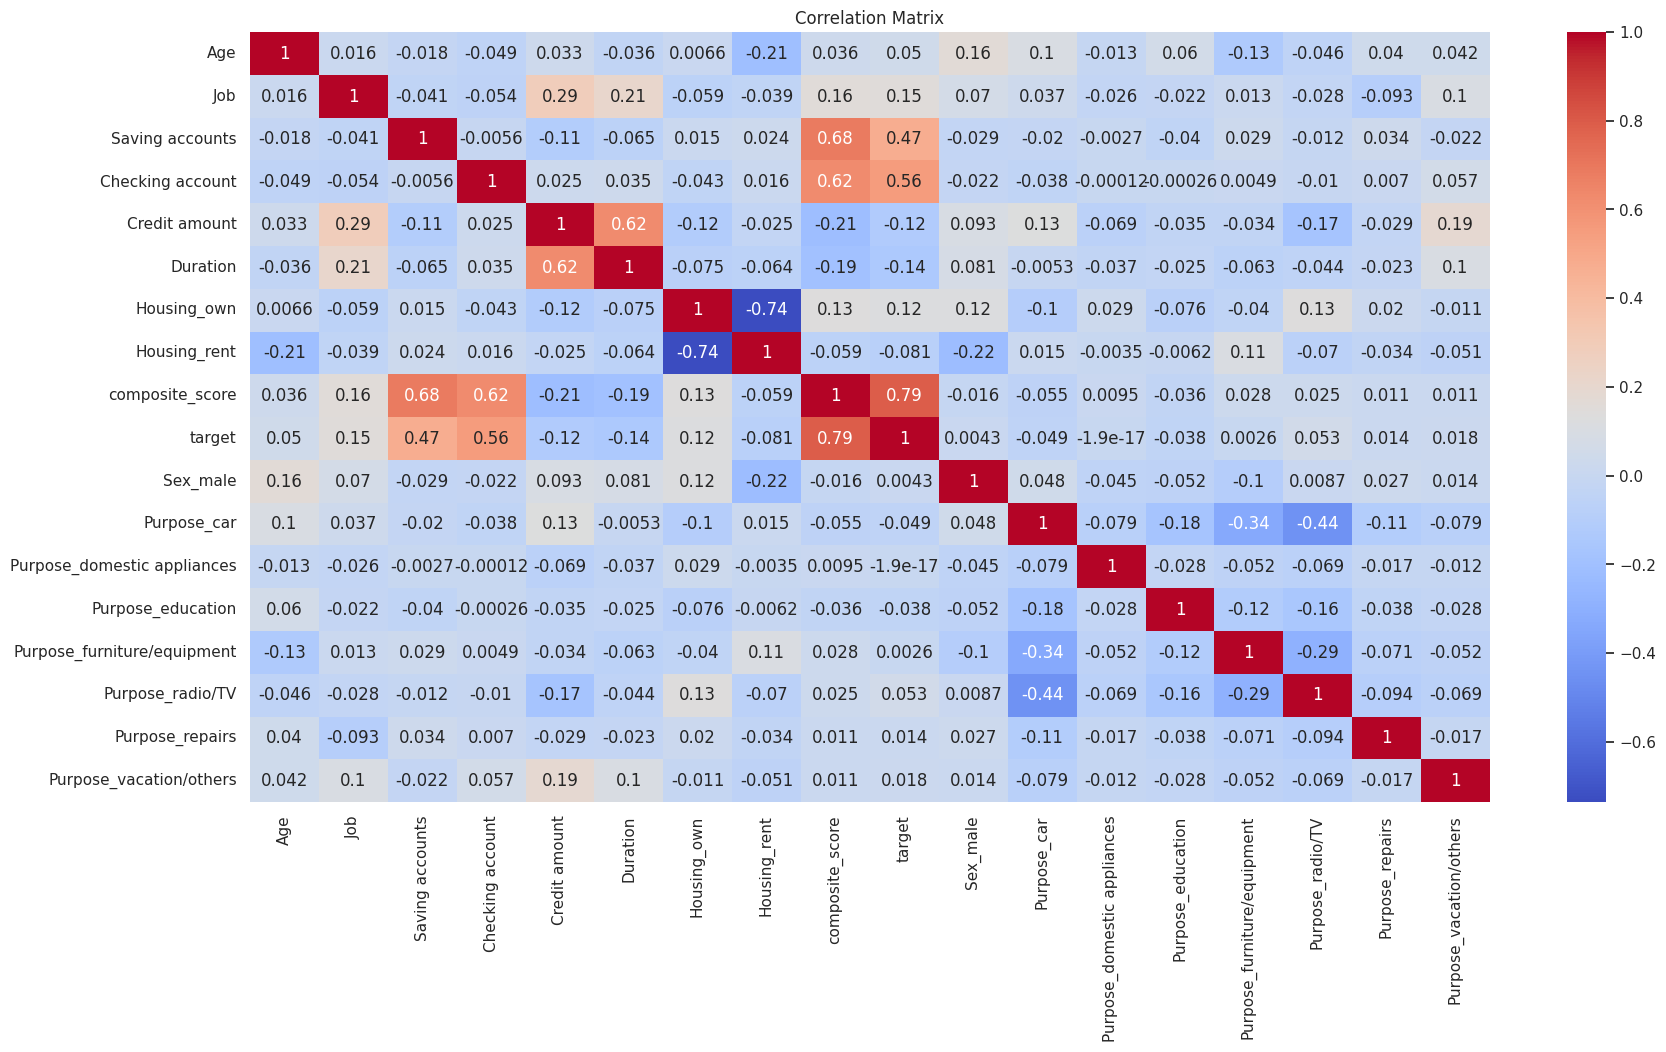

In [88]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [93]:
corr= df.corr(numeric_only=True)['target'].sort_values(ascending=False).round(5)
print(corr)

target                         1.00000
composite_score                0.79024
Checking account               0.55721
Saving accounts                0.47393
Job                            0.14695
Housing_own                    0.12158
Purpose_radio/TV               0.05345
Age                            0.05031
Purpose_vacation/others        0.01837
Purpose_repairs                0.01363
Sex_male                       0.00432
Purpose_furniture/equipment    0.00260
Purpose_domestic appliances   -0.00000
Purpose_education             -0.03820
Purpose_car                   -0.04866
Housing_rent                  -0.08087
Credit amount                 -0.12148
Duration                      -0.14163
Name: target, dtype: float64


In [94]:
modified_df=df.copy()

In [95]:
modified_df

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_own,Housing_rent,composite_score,target,Sex_male,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.857143,2,-1,0,0.050567,0.029412,True,False,2.211892,0,True,False,False,False,False,True,False,False
1,0.053571,2,0,1,0.313690,0.647059,True,False,2.955603,1,False,False,False,False,False,True,False,False
2,0.535714,1,0,-1,0.101574,0.117647,True,False,0.656096,0,True,False,False,True,False,False,False,False
3,0.464286,2,0,0,0.419941,0.558824,False,False,0.786169,0,True,False,False,False,True,False,False,False
4,0.607143,2,0,0,0.254209,0.294118,False,False,1.657548,0,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.214286,1,0,-1,0.081765,0.117647,True,False,0.374285,0,False,False,False,False,True,False,False,False
996,0.375000,3,0,0,0.198470,0.382353,True,False,3.404530,1,True,True,False,False,False,False,False,False
997,0.339286,2,0,-1,0.030483,0.117647,True,False,1.601849,0,True,False,False,False,False,True,False,False
998,0.071429,2,0,0,0.087763,0.602941,False,False,0.991491,0,True,False,False,False,False,True,False,False


## Creating New Features

In [96]:
# Credit to Duration Ratio- Indicates how much credit is taken relative to repayment time.
modified_df['Credit_Duration_Ratio'] = modified_df['Credit amount'] / modified_df['Duration']


In [97]:
#  Credit to Age Ratio- Younger people taking high credit may be riskier.
modified_df['Credit_Age_Ratio'] = modified_df['Credit amount'] / modified_df['Age']

In [98]:
#Has_Saving_Account- A binary flag from saving accounts — good indicator.
modified_df['Has_Saving_Account'] = modified_df['Saving accounts'].apply(lambda x: 0 if x == -1 else 1)


In [99]:
modified_df

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_own,Housing_rent,composite_score,target,...,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Credit_Duration_Ratio,Credit_Age_Ratio,Has_Saving_Account
0,0.857143,2,-1,0,0.050567,0.029412,True,False,2.211892,0,...,False,False,False,False,True,False,False,1.719269,0.058995,0
1,0.053571,2,0,1,0.313690,0.647059,True,False,2.955603,1,...,False,False,False,False,True,False,False,0.484793,5.855545,1
2,0.535714,1,0,-1,0.101574,0.117647,True,False,0.656096,0,...,False,False,True,False,False,False,False,0.863376,0.189604,1
3,0.464286,2,0,0,0.419941,0.558824,False,False,0.786169,0,...,False,False,False,True,False,False,False,0.751473,0.904487,1
4,0.607143,2,0,0,0.254209,0.294118,False,False,1.657548,0,...,True,False,False,False,False,False,False,0.864312,0.418698,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.214286,1,0,-1,0.081765,0.117647,True,False,0.374285,0,...,False,False,False,True,False,False,False,0.695004,0.381571,1
996,0.375000,3,0,0,0.198470,0.382353,True,False,3.404530,1,...,True,False,False,False,False,False,False,0.519076,0.529254,1
997,0.339286,2,0,-1,0.030483,0.117647,True,False,1.601849,0,...,False,False,False,False,True,False,False,0.259106,0.089845,1
998,0.071429,2,0,0,0.087763,0.602941,False,False,0.991491,0,...,False,False,False,False,True,False,False,0.145558,1.228678,1


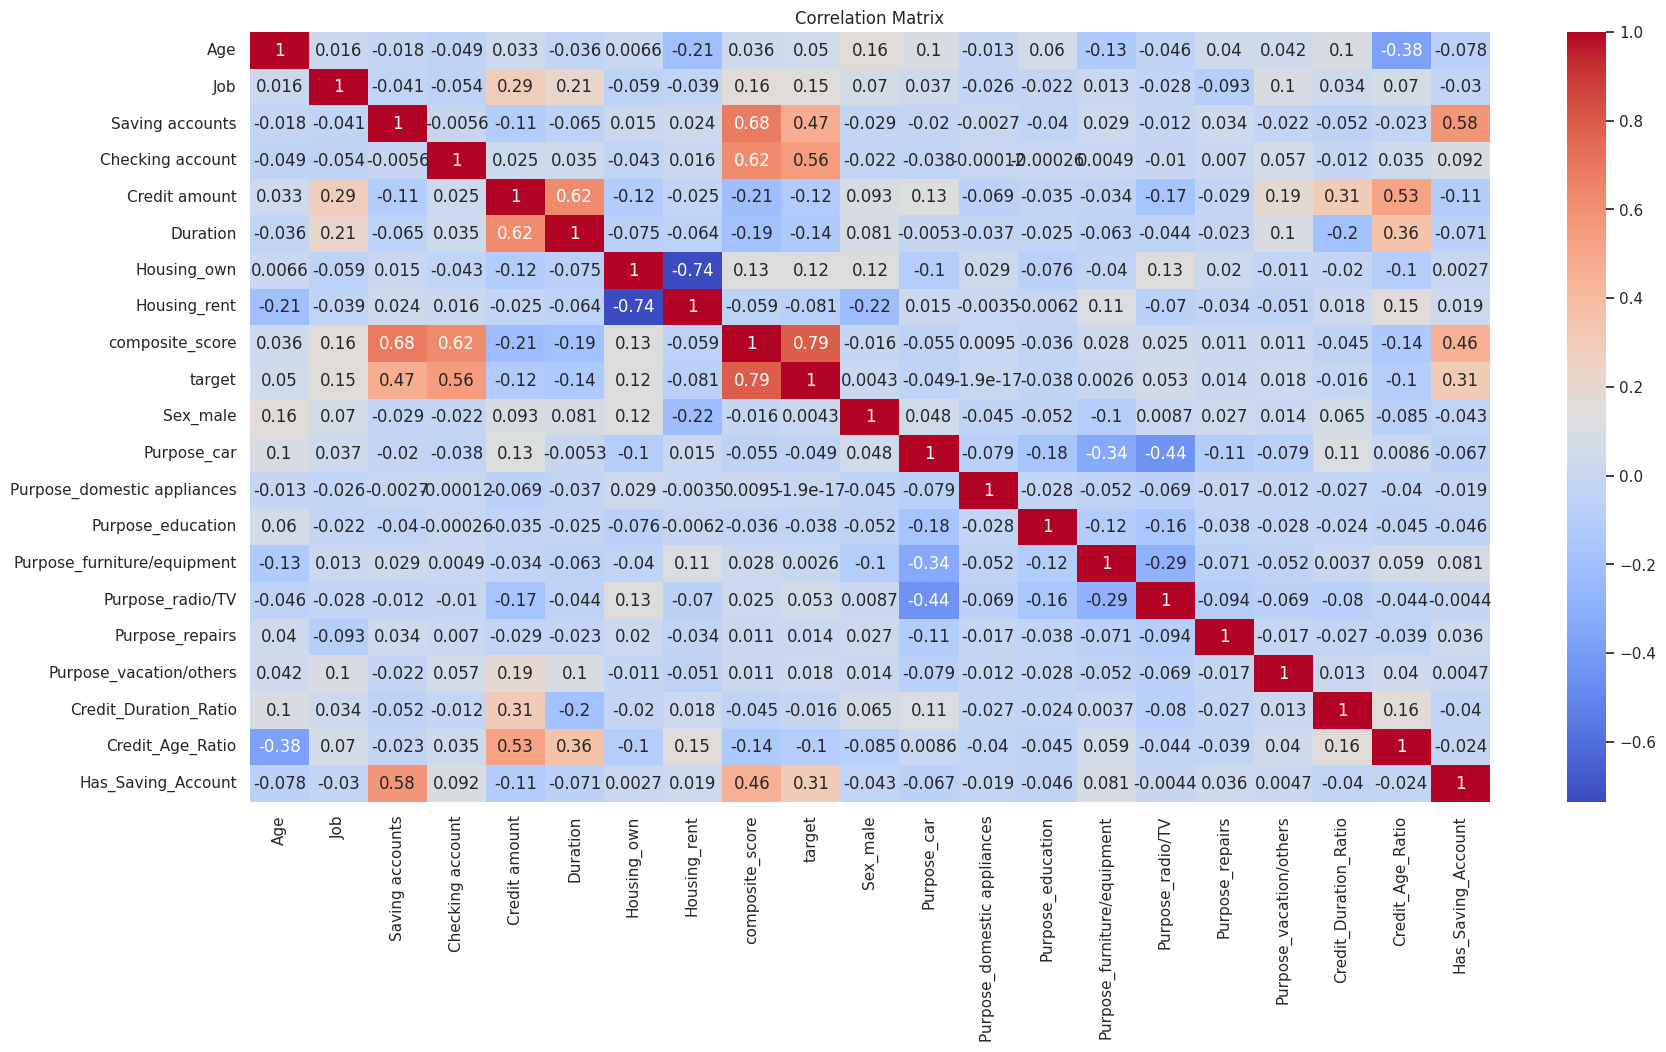

In [100]:
plt.figure(figsize=(20, 10))
sns.heatmap(modified_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [101]:
corr= modified_df.corr(numeric_only=True)['target'].sort_values(ascending=False).round(5)
print(corr)

target                         1.00000
composite_score                0.79024
Checking account               0.55721
Saving accounts                0.47393
Has_Saving_Account             0.30776
Job                            0.14695
Housing_own                    0.12158
Purpose_radio/TV               0.05345
Age                            0.05031
Purpose_vacation/others        0.01837
Purpose_repairs                0.01363
Sex_male                       0.00432
Purpose_furniture/equipment    0.00260
Purpose_domestic appliances   -0.00000
Credit_Duration_Ratio         -0.01609
Purpose_education             -0.03820
Purpose_car                   -0.04866
Housing_rent                  -0.08087
Credit_Age_Ratio              -0.10160
Credit amount                 -0.12148
Duration                      -0.14163
Name: target, dtype: float64


In [102]:
modified_df.columns

Index(['Age', 'Job', 'Saving accounts', 'Checking account', 'Credit amount',
       'Duration', 'Housing_own', 'Housing_rent', 'composite_score', 'target',
       'Sex_male', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others', 'Credit_Duration_Ratio',
       'Credit_Age_Ratio', 'Has_Saving_Account'],
      dtype='object')

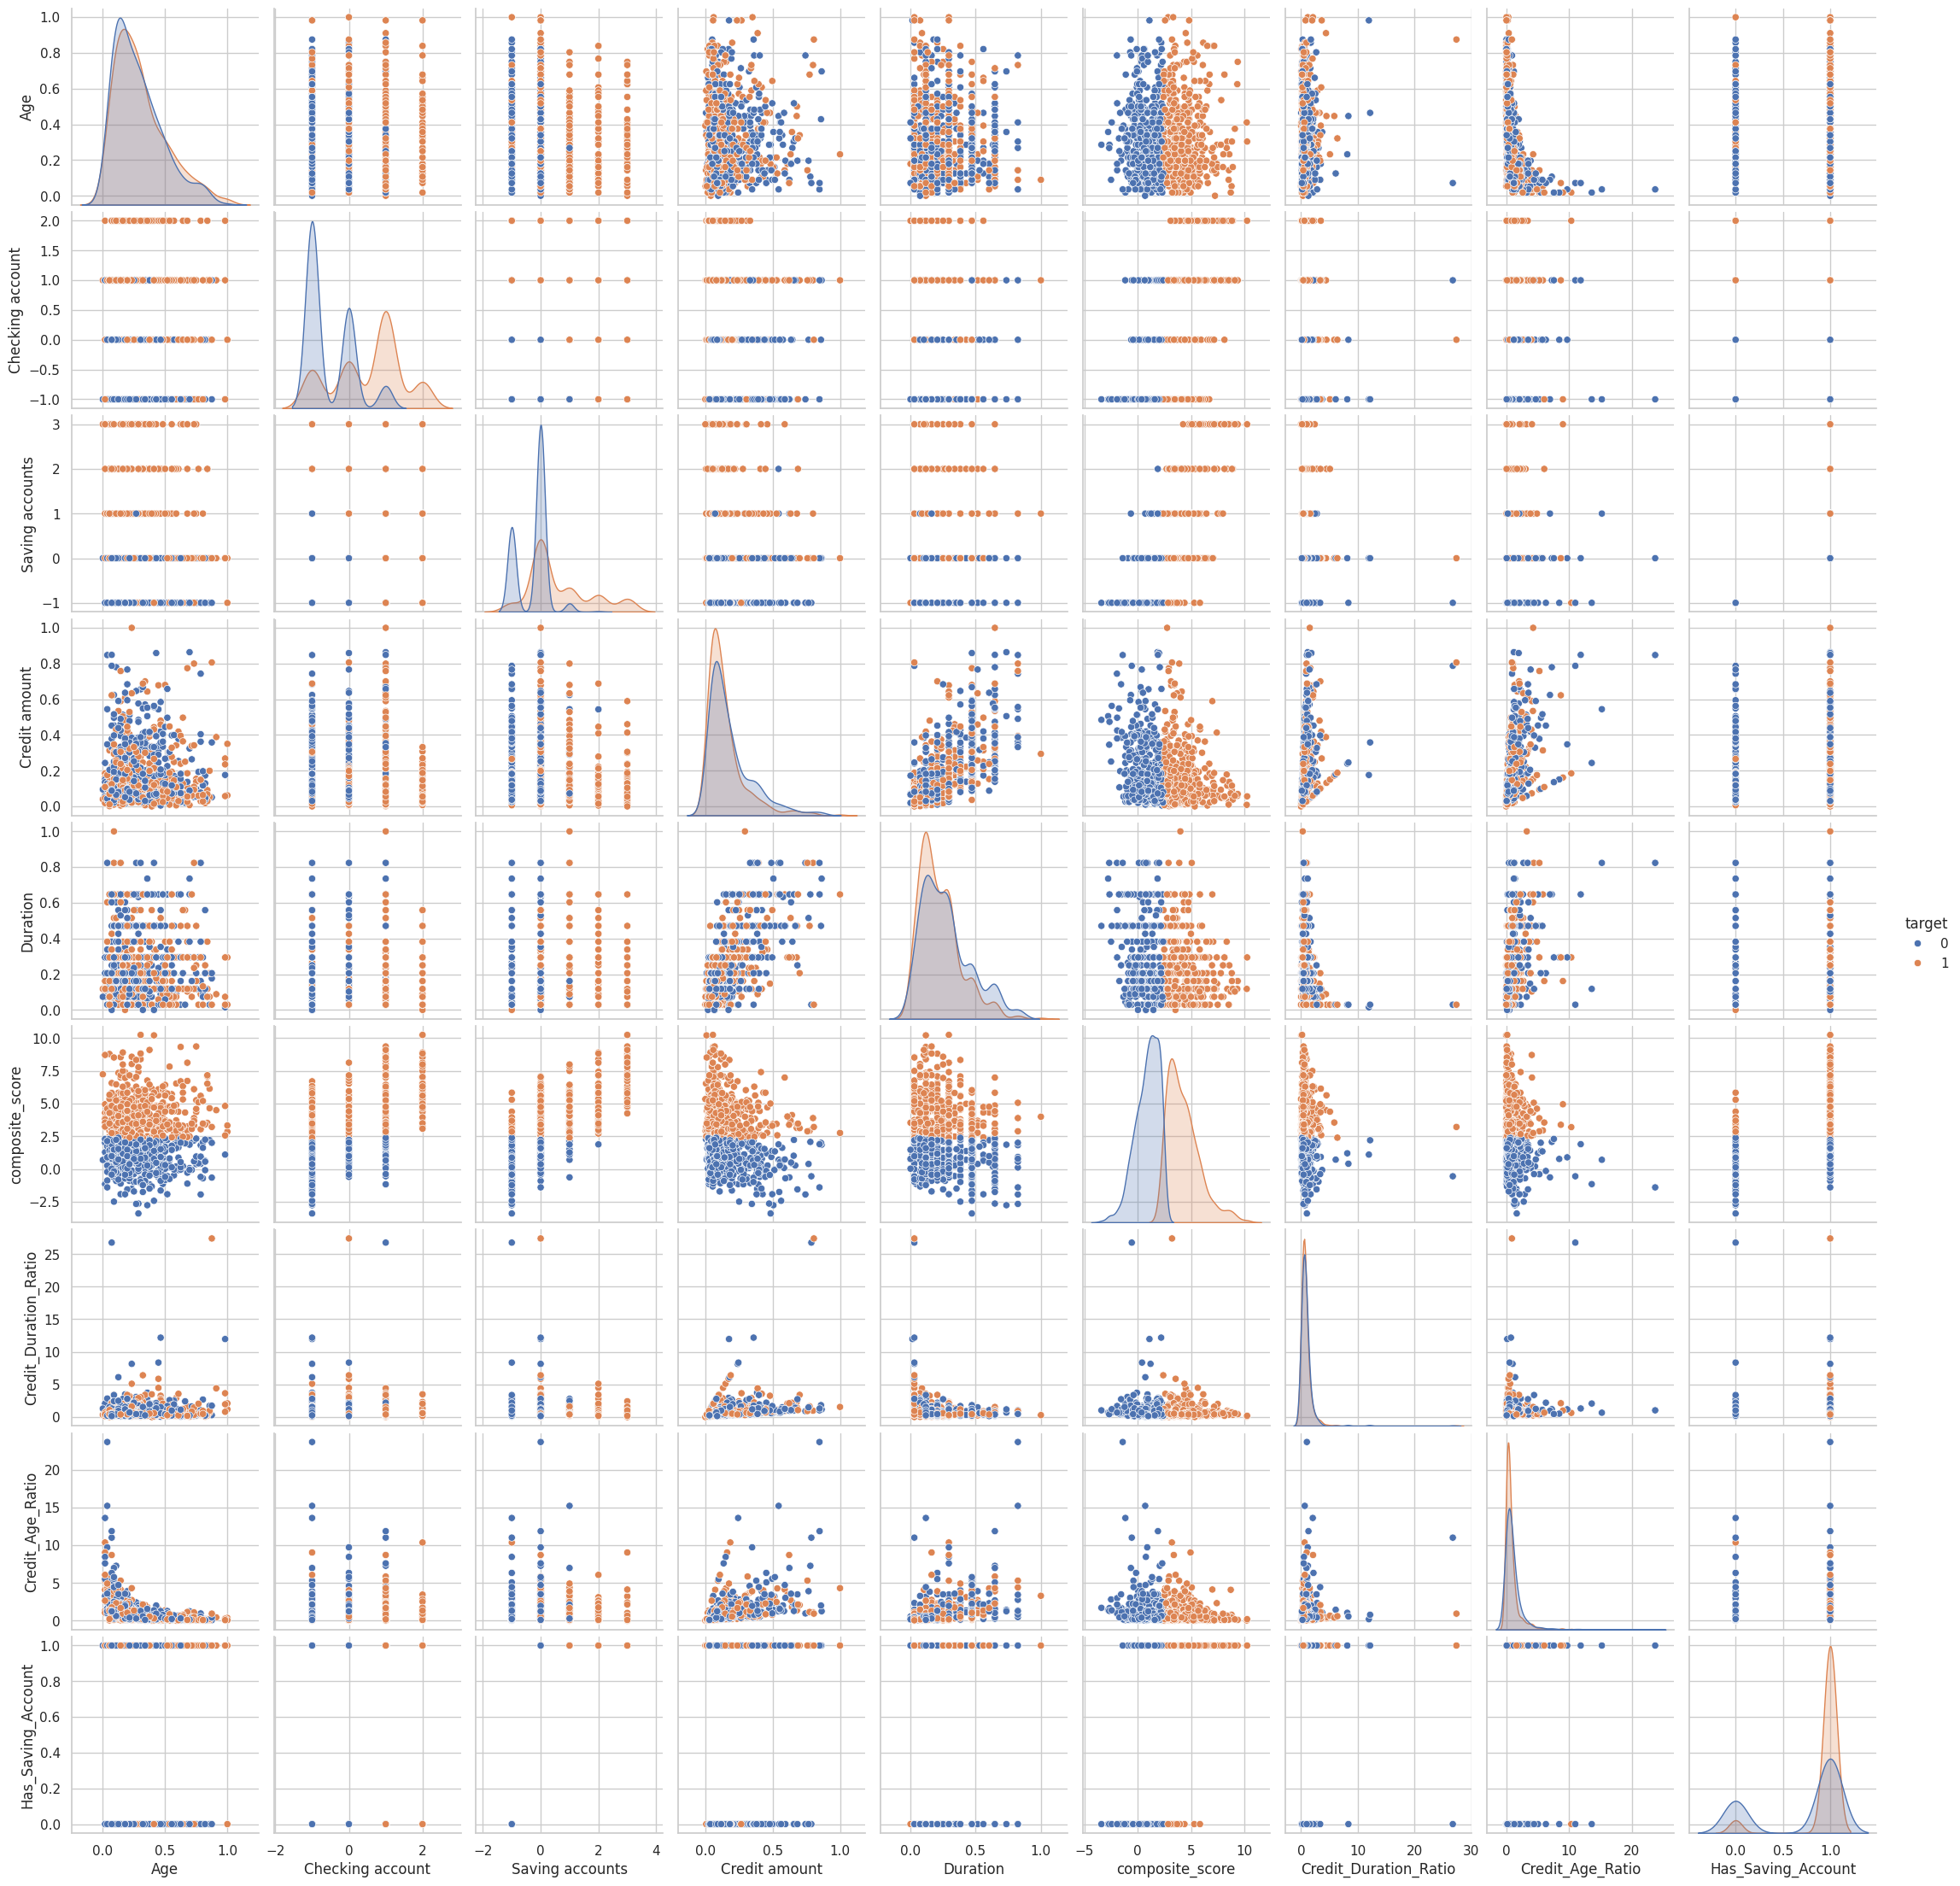

In [103]:
sns.pairplot(modified_df[['Age', 'Checking account','Saving accounts', 'Credit amount',
       'Duration', 'composite_score', 'target', 'Credit_Duration_Ratio',
       'Credit_Age_Ratio','Has_Saving_Account']], hue='target')
plt.show()

Insights:
- There ar no multicolinearity between features.

## based on correlation selected features are:

    'composite_score',
    'Checking account',
    'Saving accounts',
    'Job',
    'Housing_own',
    'Credit amount',
    'Duration',
    'Credit_Age_Ratio'



In [104]:
selected_features = [
'composite_score',
'Checking account',
'Saving accounts',
'Job',
'Housing_own',
'Credit amount',
'Duration',
'Credit_Age_Ratio'
]

In [105]:
# downloading data sets
modified_df.to_csv("modified_data.csv", index=False)
df.to_csv("normal_df.csv", index=False)